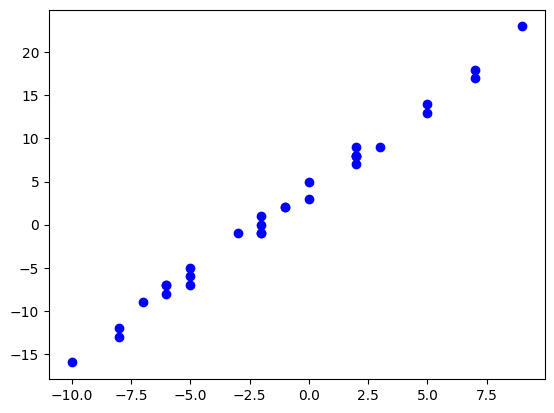

In [162]:
import numpy as np
import random
from matplotlib import pyplot as plt

w = 2
b = 3
xlim = [-10, 10]
x_train = np.random.randint(low=xlim[0], high=xlim[1], size=30)


y_train = [w * x + b + random.randint(0,2) for x in x_train]

plt.plot(x_train, y_train, 'bo')

In [163]:
import torch
from torch import nn

class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1))
    self.bias = nn.Parameter(torch.randn(1))

  def forward(self, input):
    return (input * self.weight) + self.bias

In [164]:
model = LinearModel()
x = torch.tensor(3)
y = model(x)
y

tensor([0.2568], grad_fn=<AddBackward0>)

In [165]:
model = LinearModel()
# 定义优化器
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, weight_decay=1e-2, momentum=0.9)

y_train = torch.tensor(y_train, dtype=torch.float32)
for _ in range(1000):
    input = torch.from_numpy(x_train)
    output = model(input)
    loss = nn.MSELoss()(output, y_train)
    model.zero_grad()
    loss.backward()
    optimizer.step()

In [166]:
for parameter in model.named_parameters():
  print(parameter)


('weight', Parameter containing:
tensor([1.9483], requires_grad=True))
('bias', Parameter containing:
tensor([3.4081], requires_grad=True))


In [167]:
torch.save(model.state_dict(), './linear_model.pth')
print(model.state_dict())

OrderedDict([('weight', tensor([1.9483])), ('bias', tensor([3.4081]))])


In [168]:
# 先定义网络结构
linear_model = LinearModel()
# 加载保存的参数
linear_model.load_state_dict(torch.load('./linear_model.pth'))
linear_model.eval()
for parameter in linear_model.named_parameters():
  print(parameter)


('weight', Parameter containing:
tensor([1.9483], requires_grad=True))
('bias', Parameter containing:
tensor([3.4081], requires_grad=True))


In [169]:
# 保存整个模型
torch.save(model, './linear_model_with_arc.pth')
# 加载模型，不需要创建网络了
linear_model_2 = torch.load('./linear_model_with_arc.pth')
linear_model_2.eval()
for parameter in linear_model_2.named_parameters():
  print(parameter)


('weight', Parameter containing:
tensor([1.9483], requires_grad=True))
('bias', Parameter containing:
tensor([3.4081], requires_grad=True))


使用 Torchvison 中的模型进行训练

In [170]:
import torchvision.models as models
alexnet = models.alexnet(pretrained=True)

/Users/yuhuatang/code/learn_pytorch/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/yuhuatang/code/learn_pytorch/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [171]:
from PIL import Image
import torchvision
import torchvision.transforms as transforms

im = Image.open('./dog.jpg')

transform = transforms.Compose([
    transforms.RandomResizedCrop((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

input_tensor = transform(im).unsqueeze(0)
alexnet(input_tensor).argmax()


tensor(263)

Files already downloaded and verified
torch.Size([32, 3, 32, 32])


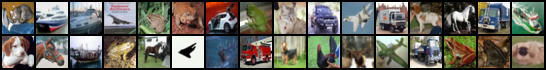

In [172]:
from torch.utils.data import DataLoader
cifar10_dataset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       transform=transforms.ToTensor(),
                                       target_transform=None,
                                       download=True)
# 取32张图片的tensor
tensor_dataloader = DataLoader(dataset=cifar10_dataset,
                               batch_size=32)
data_iter = iter(tensor_dataloader)
img_tensor, label_tensor = data_iter.__next__()
print(img_tensor.shape)
grid_tensor = torchvision.utils.make_grid(img_tensor, nrow=16, padding=2)
grid_img = transforms.ToPILImage()(grid_tensor)
display(grid_img)

In [173]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [174]:
fc_in_features = alexnet.classifier[6].in_features
# 修改预训练模型的输出分类数
alexnet.classifier[6] = torch.nn.Linear(fc_in_features, 10)
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [177]:
transform = transforms.Compose([
    transforms.RandomResizedCrop((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
cifar10_dataset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       transform=transform,
                                       target_transform=None,
                                       download=True)
dataloader = DataLoader(dataset=cifar10_dataset, # 传入的数据集, 必须参数
                               batch_size=32,       # 输出的batch大小
                               shuffle=True,       # 数据是否打乱
                               num_workers=2)      # 进程数, 0表示只有主进程

optimizer = torch.optim.SGD(alexnet.parameters(), lr=1e-4, weight_decay=1e-2, momentum=0.9)

# 训练3个Epoch
for epoch in range(3):
    for item in dataloader: 
        output = alexnet(item[0])
        target = item[1]
        # 使用交叉熵损失函数
        loss = nn.CrossEntropyLoss()(output, target)
        print('Epoch {}, Loss {}'.format(epoch + 1 , loss))
        #以下代码的含义，我们在之前的文章中已经介绍过了
        alexnet.zero_grad()
        loss.backward()
        optimizer.step()


Files already downloaded and verified
Epoch 1, Loss 2.2249159812927246
Epoch 1, Loss 2.388052463531494
Epoch 1, Loss 2.4313712120056152
Epoch 1, Loss 2.3941245079040527
Epoch 1, Loss 2.3477275371551514
Epoch 1, Loss 2.2331676483154297
Epoch 1, Loss 2.3324952125549316
Epoch 1, Loss 2.3453564643859863
Epoch 1, Loss 2.3042383193969727
Epoch 1, Loss 2.2730703353881836
Epoch 1, Loss 2.2809078693389893
Epoch 1, Loss 2.215601921081543
Epoch 1, Loss 2.2642159461975098
Epoch 1, Loss 2.202282667160034
Epoch 1, Loss 2.288083553314209
Epoch 1, Loss 2.246936321258545
Epoch 1, Loss 2.287273406982422
Epoch 1, Loss 2.3120229244232178
Epoch 1, Loss 2.117987632751465
Epoch 1, Loss 2.1546828746795654
Epoch 1, Loss 2.068513870239258
Epoch 1, Loss 2.1779403686523438
Epoch 1, Loss 2.1691031455993652
Epoch 1, Loss 2.204986095428467
Epoch 1, Loss 2.0980288982391357
Epoch 1, Loss 2.0942940711975098
Epoch 1, Loss 2.119539737701416
Epoch 1, Loss 2.173865795135498
Epoch 1, Loss 2.173814535140991
Epoch 1, Loss 2.1